In [1]:
# y = a * x ^ 2 + b * x + c
# let's do this with a gradient descent


In [2]:
import time
import mlx.core as mx
import matplotlib.pyplot as plt


Loss 0.25928, L2 distance: |w-w*| = 8.66065, Throughput 229.76596 (it/s)


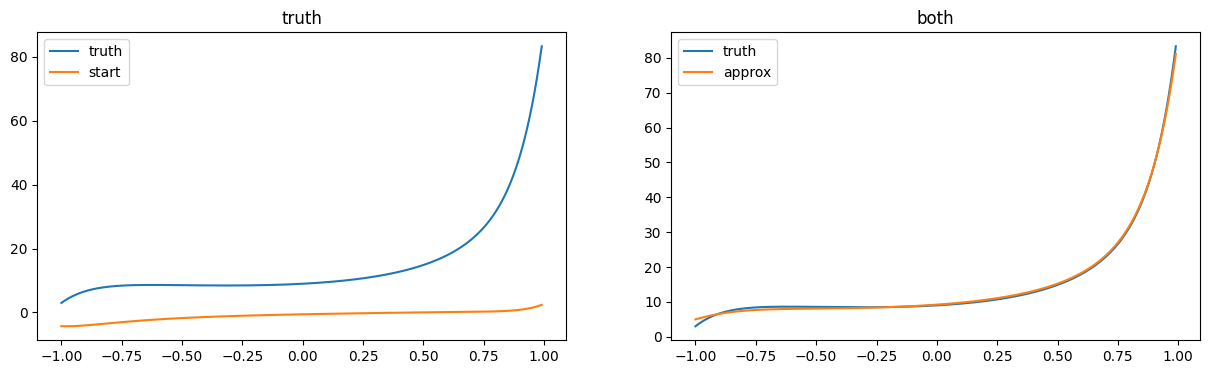

In [4]:
order = 15

# input
x = mx.arange(-100,100) / 100
# w_star = mx.array([1, 5, 5])
w_star = mx.random.randint(0,10,[order])

def f(u, w):
    # return w[0] * u ** 2 + w[1] * u + w[2]
    us = [u**e for e in reversed(list(range(order))[1:])]
    return w @ mx.array(us + [mx.ones(u.shape[0])])

# target
y = f(x, w_star)

# random init
w = mx.random.normal([order])
first_w = w
ws = [first_w]

def loss_fn(w):
    return mx.mean(mx.square(y - f(x, w)))

num_iters = 50
lr = 0.2

grad_fn = mx.grad(loss_fn)

tic = time.time()
for _ in range(num_iters):
    grad = grad_fn(w)
    w = w - lr * grad
    mx.eval(w)
    ws.append(w)
    # print(f"loss: {loss_fn(w).item()}")
toc = time.time()

loss = loss_fn(w)
error_norm = mx.sum(mx.square(w - w_star)).item() ** 0.5
throughput = num_iters / (toc - tic)

print(
    f"Loss {loss.item():.5f}, L2 distance: |w-w*| = {error_norm:.5f}, "
    f"Throughput {throughput:.5f} (it/s)"
)

fig, axs = plt.subplots(1, 2, figsize=(15, 4));

axs[0].plot(x, y, label='truth')
axs[0].plot(x, f(x, first_w), label='start')
axs[0].set_title("truth")
axs[0].legend();

axs[1].plot(x, y, label='truth')
axs[1].plot(x, f(x, w), label='approx')
axs[1].set_title("both")
axs[1].legend();


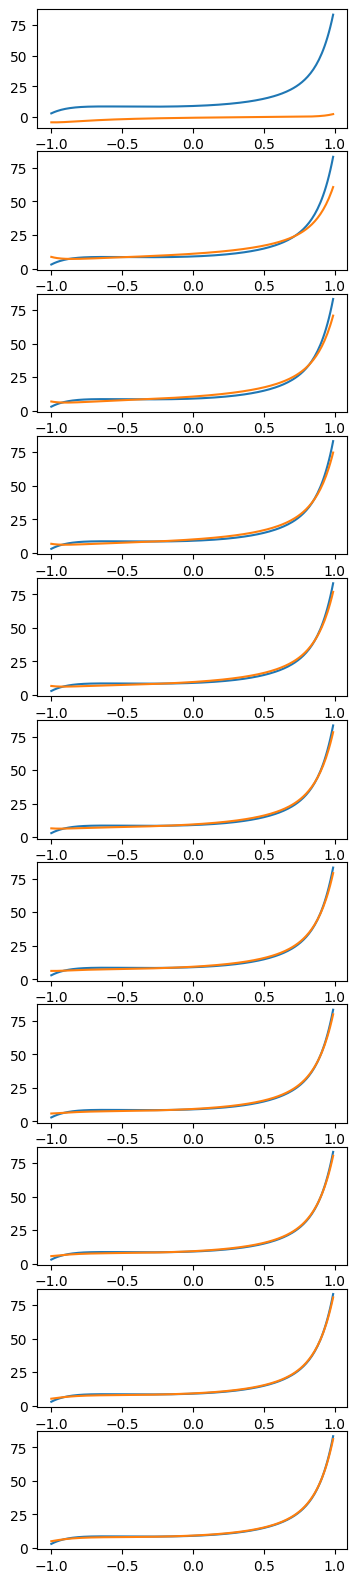

In [5]:
w_to_plot = [ws[i] for i in range(len(ws)) if i % 5 == 0]

fig, axs = plt.subplots(len(w_to_plot), 1, figsize=(4, 20));

for i, my_w in enumerate(w_to_plot):
    axs[i].plot(x, y, label='truth')
    axs[i].plot(x, f(x, my_w), label='approx')
    # axs[i].set_title("both")
    # axs[i].legend();

Loss 13.96371 Throughput 288.11822 (it/s)


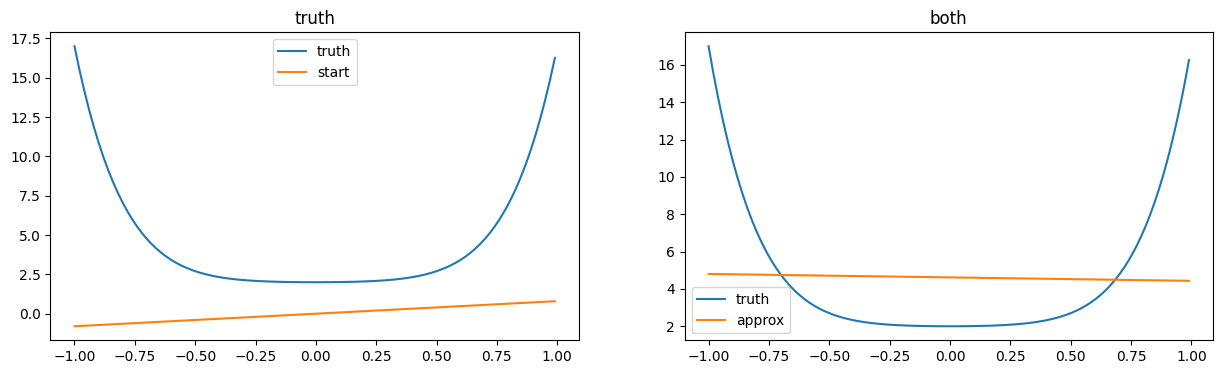

In [6]:
order = 7

# input
x = mx.arange(-100,100) / 100
w_star = mx.random.randint(0,10,[order])
a = mx.random.randint(0, 10) / 10
b = mx.random.randint(0, 10) / 10
w = mx.array([a, b])

def f(u, w):
    # return w[0] * u ** 2 + w[1] * u + w[2]
    us = [u**e for e in reversed(list(range(order))[1:])]
    return w @ mx.array(us + [mx.ones(u.shape[0])])

def f_hat(u, w):
    return w[0] * u + w[1]

# target
y = f(x, w_star)

first_w = w
ws = [first_w]

def loss_fn(w):
    return mx.mean(mx.square(y - f_hat(x, w)))

num_iters = 50
lr = 0.2

grad_fn = mx.grad(loss_fn)

tic = time.time()
for _ in range(num_iters):
    grad = grad_fn(w)
    w = w - lr * grad
    mx.eval(w)
    ws.append(w)
toc = time.time()

loss = loss_fn(w)
# error_norm = mx.sum(mx.square(w - w_star)).item() ** 0.5
throughput = num_iters / (toc - tic)

print(
    f"Loss {loss.item():.5f}",
    f"Throughput {throughput:.5f} (it/s)"
)

fig, axs = plt.subplots(1, 2, figsize=(15, 4));

axs[0].plot(x, y, label='truth')
axs[0].plot(x, f_hat(x, first_w), label='start')
axs[0].set_title("truth")
axs[0].legend();

axs[1].plot(x, y, label='truth')
axs[1].plot(x, f_hat(x, w), label='approx')
axs[1].set_title("both")
axs[1].legend();


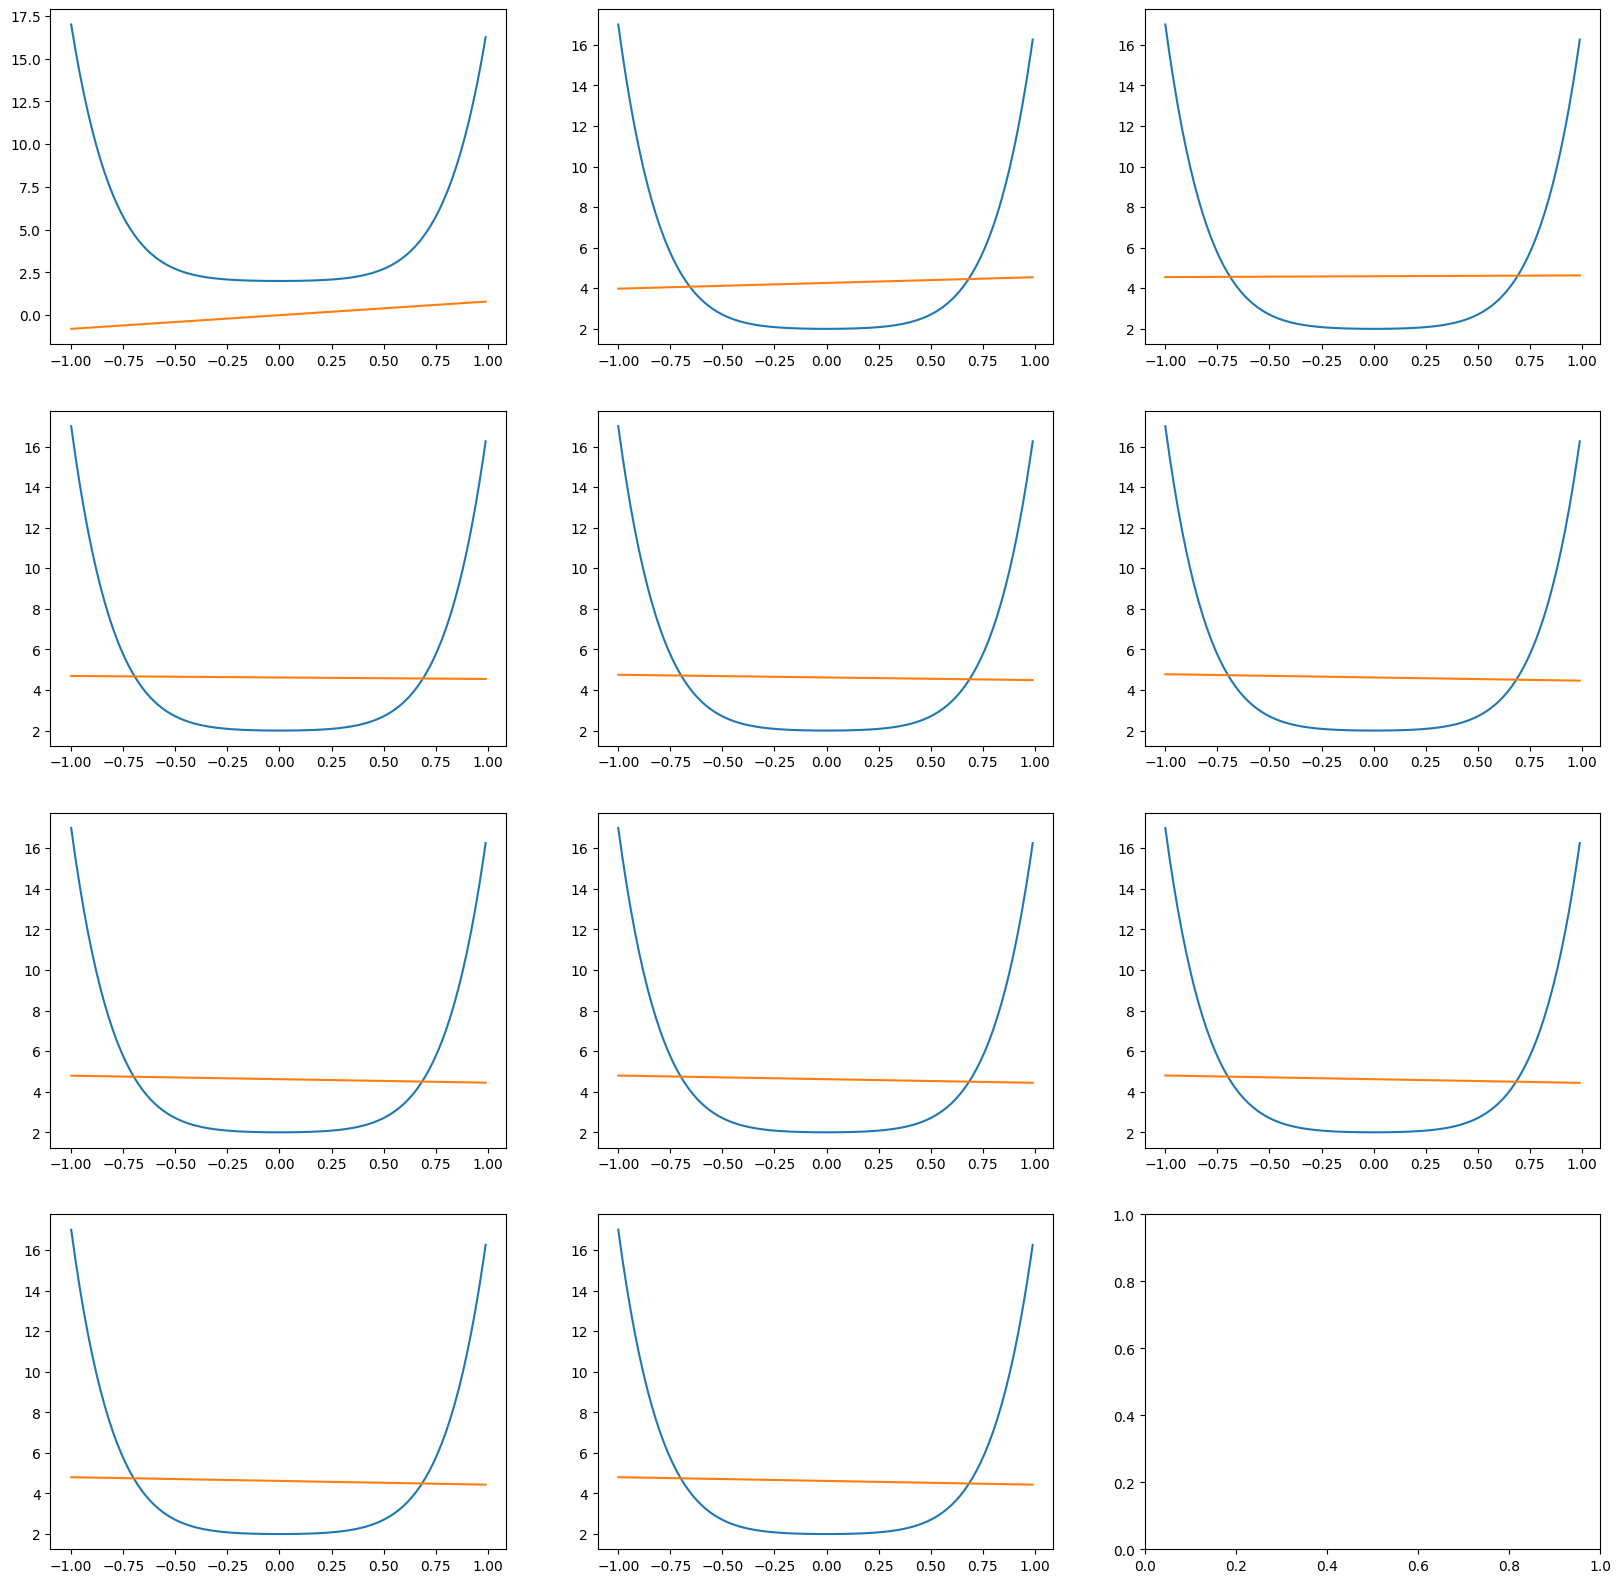

In [7]:
w_to_plot = [ws[i] for i in range(len(ws)) if i % 5 == 0]

fig, axs = plt.subplots(len(w_to_plot) // 3 + 1, 3, figsize=(20, 20));

for i, my_w in enumerate(w_to_plot):
    axs[i // 3, i - 3 * (i // 3)].plot(x, y, label='truth')
    axs[i // 3, i - 3 * (i // 3)].plot(x, f_hat(x, my_w), label='approx')

In [8]:
my_w

array([-0.184966, 4.61876], dtype=float32)

In [9]:
x @ mx.random.uniform(0, 1, (200, 200))

array([-3.03477, 2.83724, -3.30006, ..., 4.17678, 1.80784, -3.05929], dtype=float32)

Loss 0.00005 Throughput 1095.24436 (it/s)


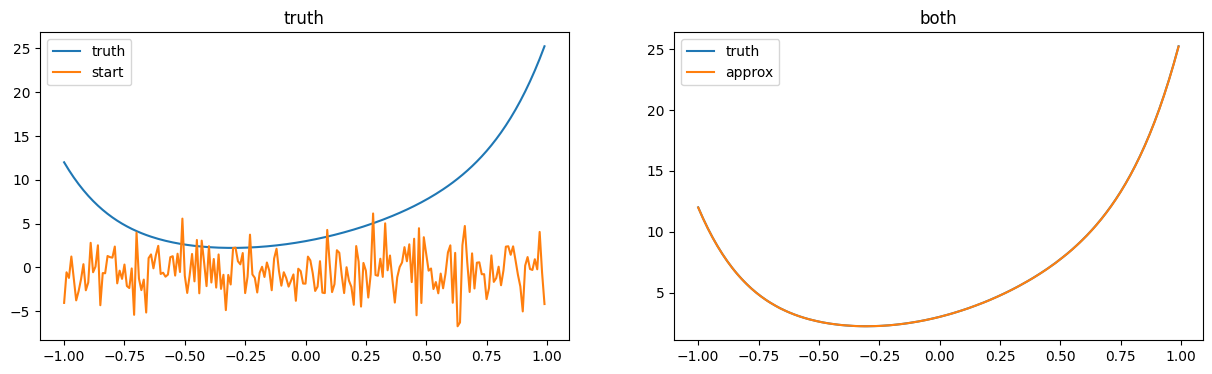

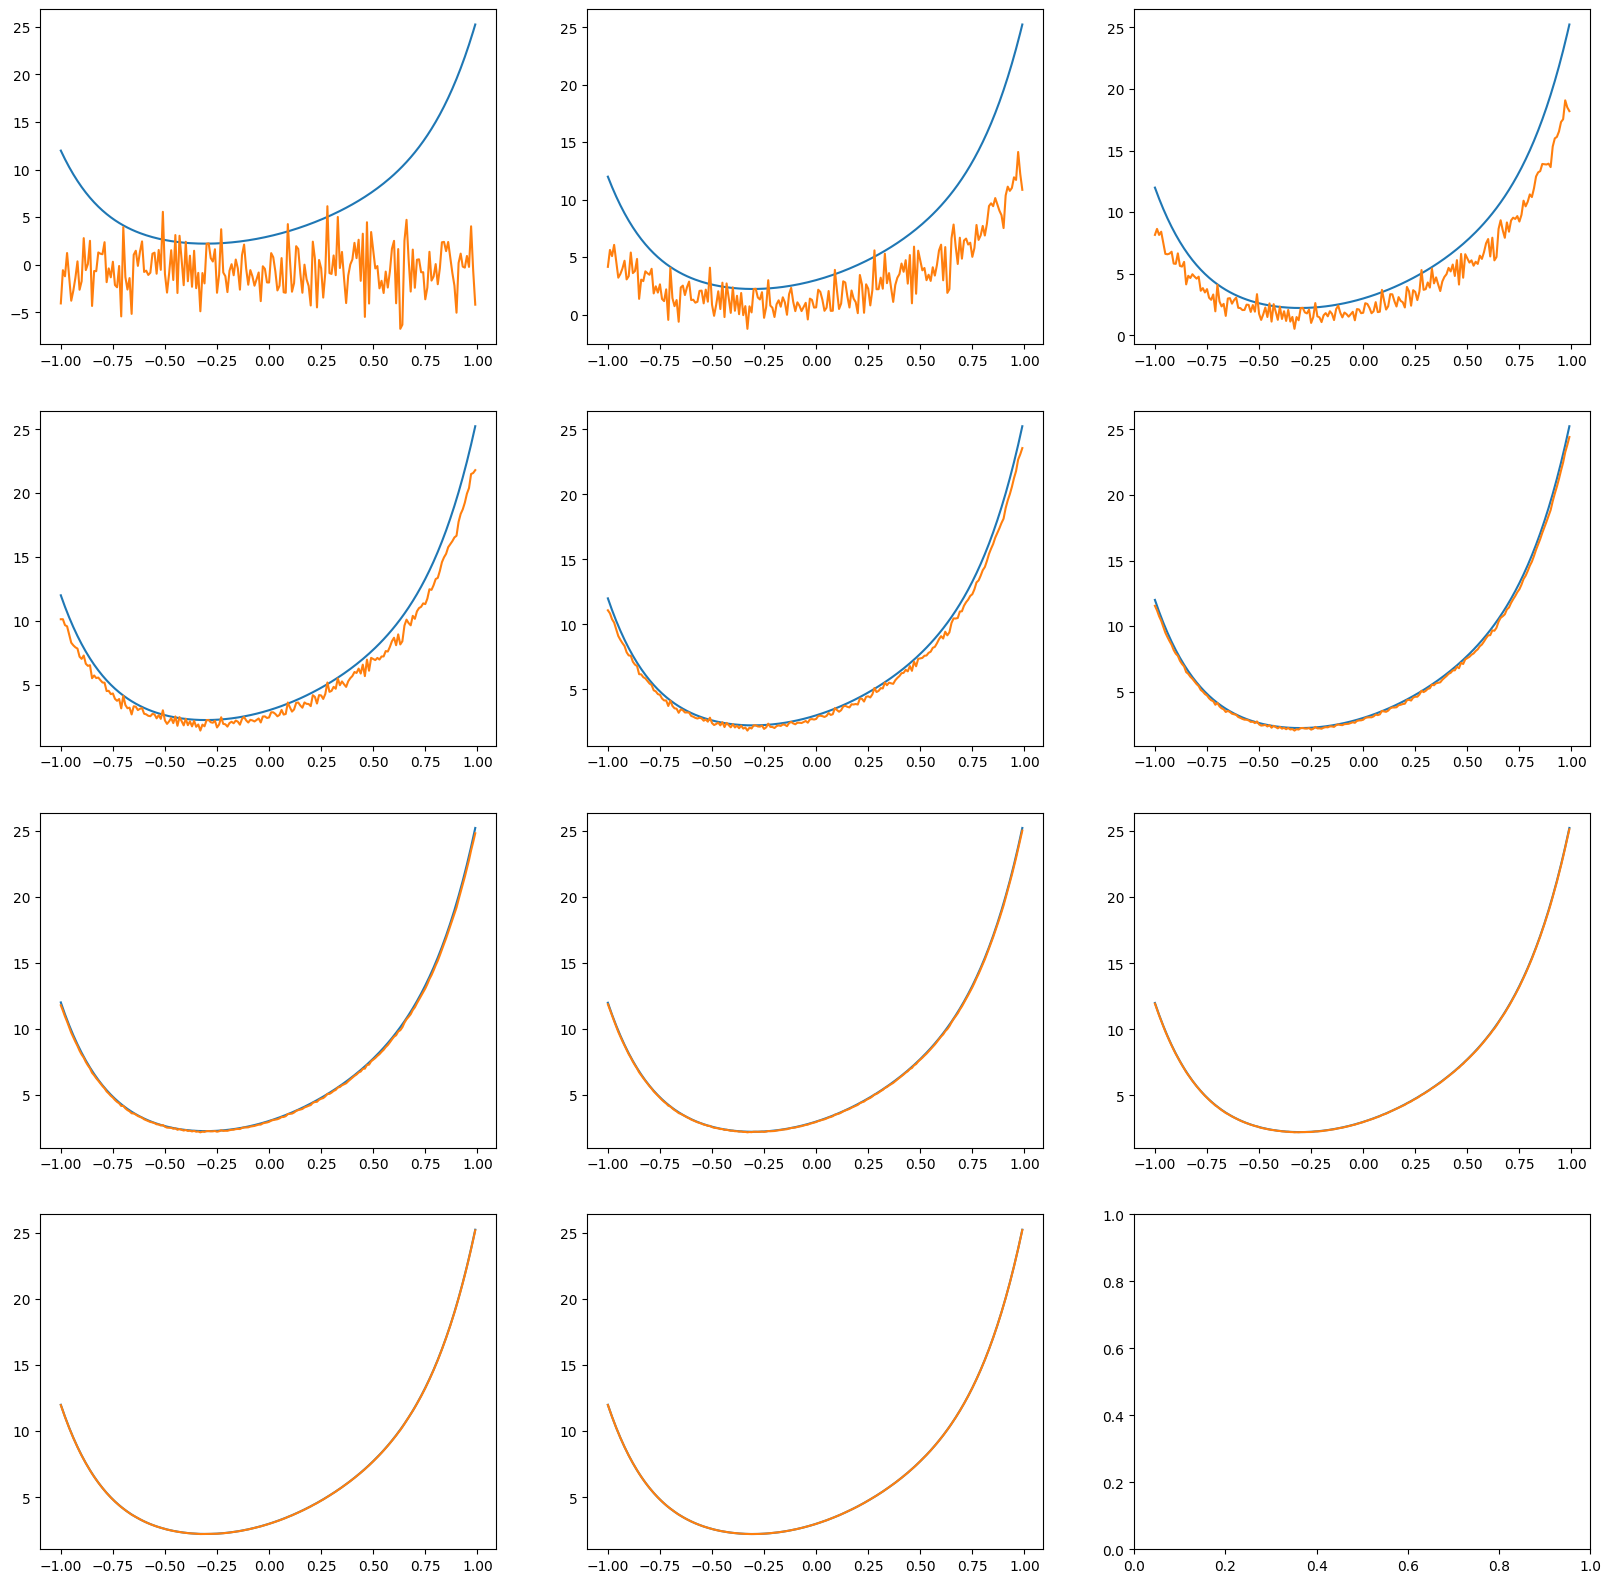

In [10]:
order = 7

# input
x = mx.arange(-100,100) / 100
w_star = mx.random.randint(0,10,[order])
w = mx.random.uniform(0, 1, (200, 200))

def f(u, w):
    # return w[0] * u ** 2 + w[1] * u + w[2]
    us = [u**e for e in reversed(list(range(order))[1:])]
    return w @ mx.array(us + [mx.ones(u.shape[0])])

def f_hat(u, w):
    return u @ w

# target
y = f(x, w_star)

first_w = w
ws = [first_w]

def loss_fn(w):
    return mx.mean(mx.square(y - f_hat(x, w)))

num_iters = 50
lr = 0.2

grad_fn = mx.grad(loss_fn)

tic = time.time()
for _ in range(num_iters):
    grad = grad_fn(w)
    w = w - lr * grad
    mx.eval(w)
    ws.append(w)
toc = time.time()

loss = loss_fn(w)
# error_norm = mx.sum(mx.square(w - w_star)).item() ** 0.5
throughput = num_iters / (toc - tic)

print(
    f"Loss {loss.item():.5f}",
    f"Throughput {throughput:.5f} (it/s)"
)

fig, axs = plt.subplots(1, 2, figsize=(15, 4));

axs[0].plot(x, y, label='truth')
axs[0].plot(x, f_hat(x, first_w), label='start')
axs[0].set_title("truth")
axs[0].legend();

axs[1].plot(x, y, label='truth')
axs[1].plot(x, f_hat(x, w), label='approx')
axs[1].set_title("both")
axs[1].legend();

w_to_plot = [ws[i] for i in range(len(ws)) if i % 5 == 0]

fig, axs = plt.subplots(len(w_to_plot) // 3 + 1, 3, figsize=(20, 20));

for i, my_w in enumerate(w_to_plot):
    axs[i // 3, i - 3 * (i // 3)].plot(x, y, label='truth')
    axs[i // 3, i - 3 * (i // 3)].plot(x, f_hat(x, my_w), label='approx')

In [11]:
x = mx.arange(-200,200,2) / 200
y = f(x, w_star)

x.shape, y.shape

((200,), (200,))

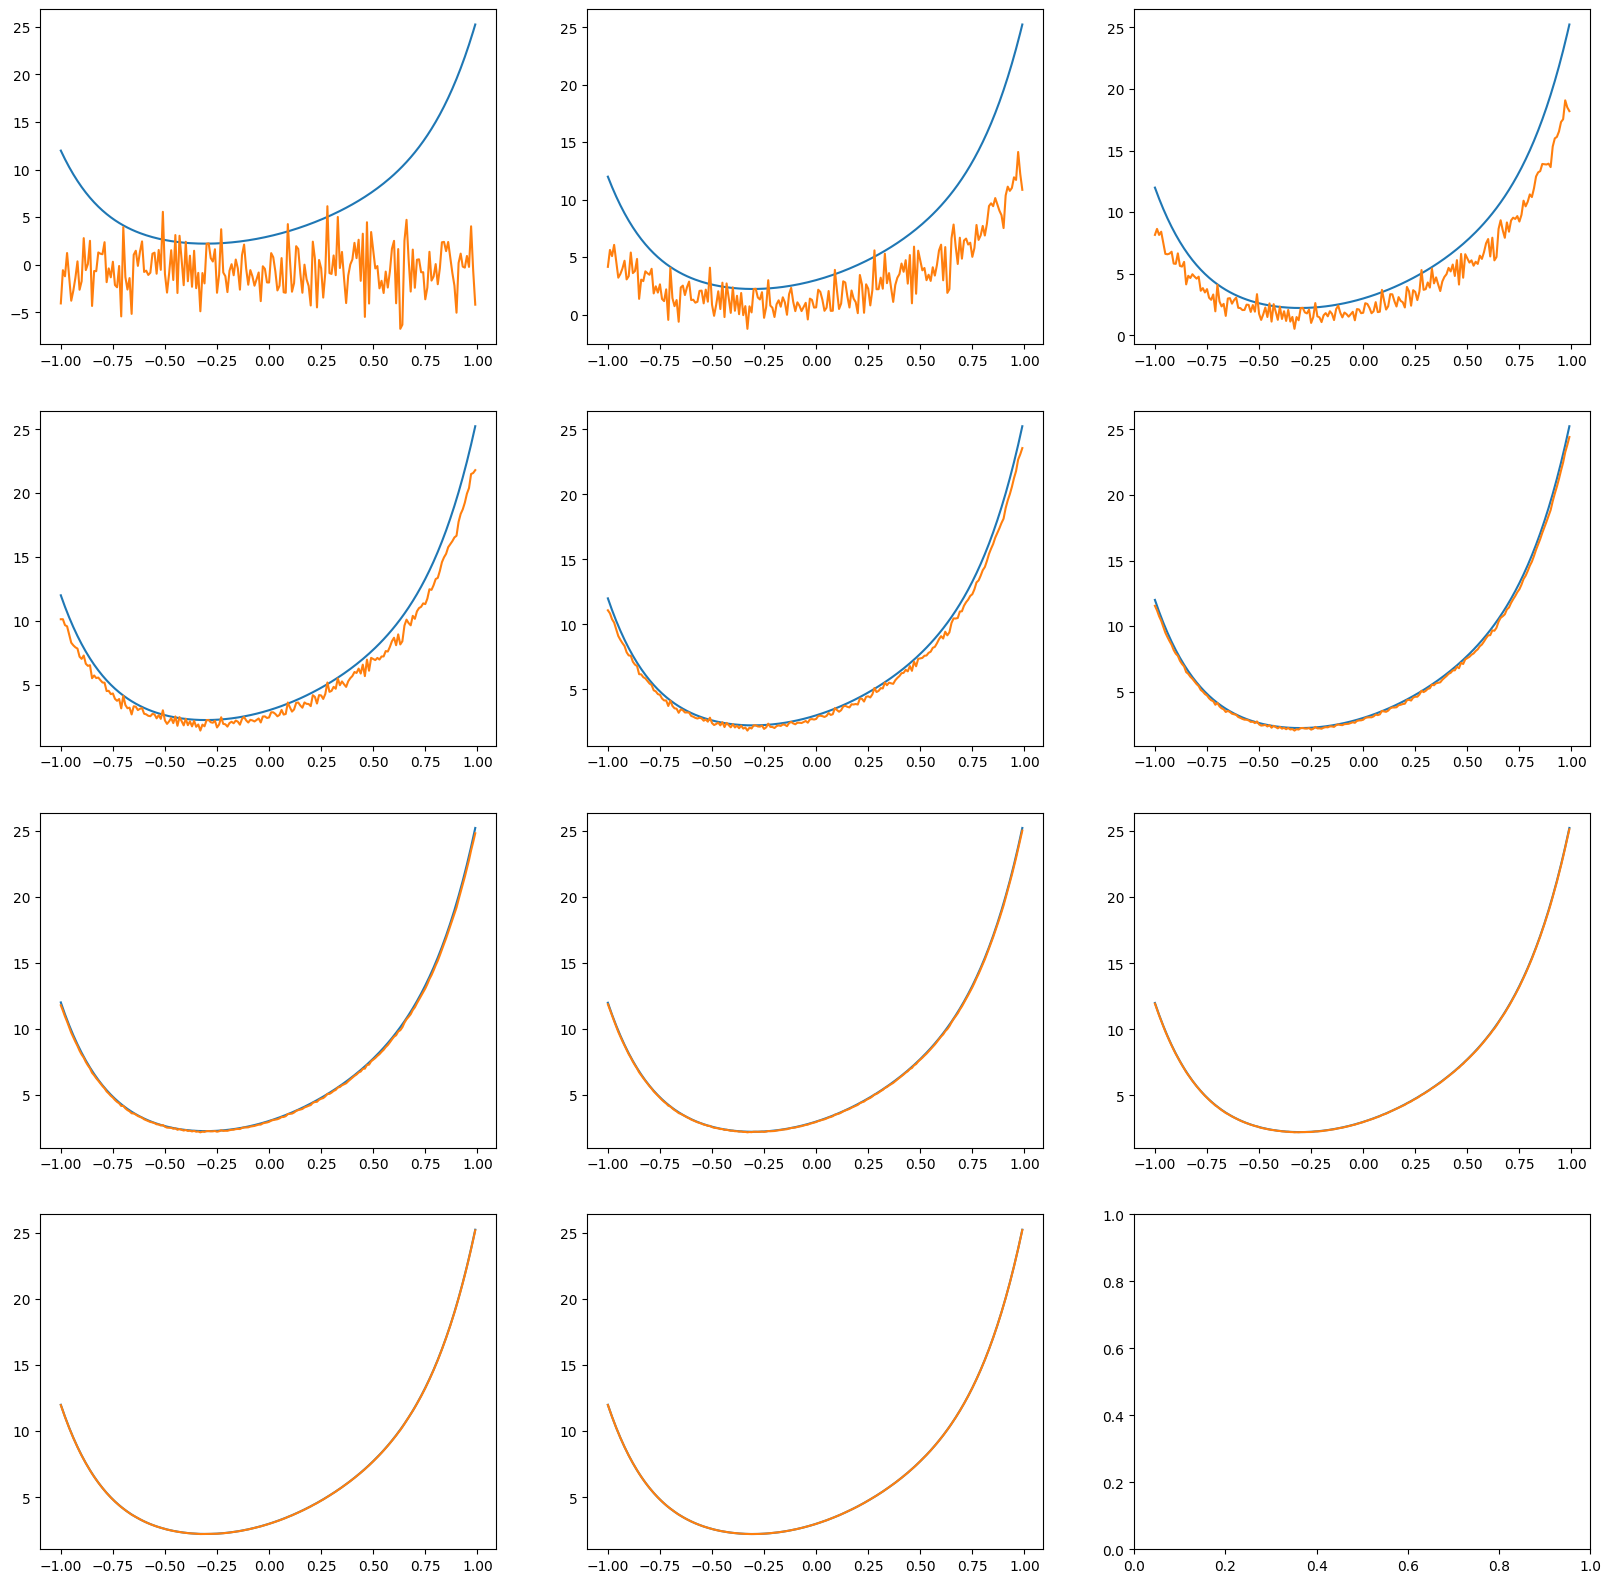

In [12]:
fig, axs = plt.subplots(len(w_to_plot) // 3 + 1, 3, figsize=(20, 20));

for i, my_w in enumerate(w_to_plot):
    axs[i // 3, i - 3 * (i // 3)].plot(x, y, label='truth')
    axs[i // 3, i - 3 * (i // 3)].plot(x, f_hat(x, my_w), label='approx')

In [13]:
x.shape, my_w[-1].shape

((200,), (200,))

In [14]:
w

array([[-0.152935, 0.333574, 0.380364, ..., 0.341383, -0.228825, 0.431464],
       [-0.0682601, -0.0274011, 0.729117, ..., 0.155707, -0.171838, 0.318116],
       [-0.0756685, 0.752393, 0.348312, ..., -0.170675, 0.112541, 0.269806],
       ...,
       [1.07504, 0.285077, 0.544101, ..., 1.00471, 0.58701, 0.887441],
       [0.707638, 0.556169, 0.349951, ..., 0.968848, 0.480162, 1.35776],
       [0.560389, 0.334362, 0.201034, ..., 0.775311, 0.662738, 0.650039]], dtype=float32)

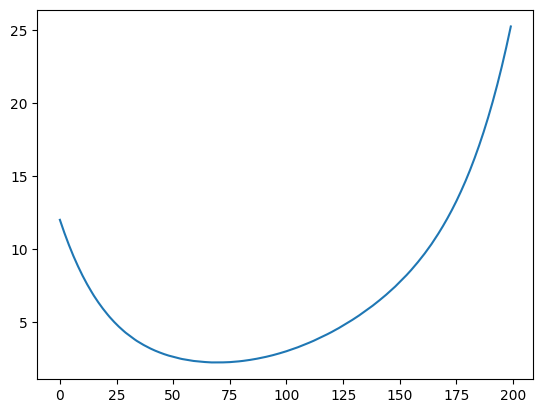

In [15]:
plt.plot(f_hat(x, w))

In [16]:
order = 7

# input
x = mx.arange(-100,100) / 100
w_star = mx.random.randint(0,10,[order])

w0 = mx.random.uniform(0, 1, (1, 10))
w1 = mx.random.uniform(0, 1, (10, 10))
w2 = mx.random.uniform(0, 1, (10, 1))

w = (w0,w1,w2)

def f(u, w_star):
    # return w[0] * u ** 2 + w[1] * u + w[2]
    us = [u**e for e in reversed(list(range(order))[1:])]
    return w_star @ mx.array(us + [mx.ones(u.shape[0])])

def f_hat(u, w):
    return u @ w[0] @ w[1] @ w[2]

# target
y = f(x, w_star)

ws = [w]

def loss_fn(y, x, w):
    return mx.mean(mx.square(y - f_hat(x, w)))

In [17]:
(mx.random.randint(-100, 100, [3]) / 100).reshape(-1,1)

array([[0.14],
       [0.58],
       [0.67]], dtype=float32)

In [18]:
f_hat(mx.array([0.1]), w)

array([2.13019], dtype=float32)

In [19]:
f_hat((mx.random.randint(-100,100, [100]) / 100).reshape(-1,1), w)

array([[-1.70415],
       [-1.49113],
       [1.91717],
       ...,
       [10.2249],
       [19.1717],
       [20.8759]], dtype=float32)

In [20]:
y.shape, x.shape

((200,), (200,))

In [21]:
num_iters = 10
lr = 0.2
bs = 30

grad_fn = mx.grad(loss_fn, 2)

tic = time.time()
for _ in range(num_iters):
    x_iter = x[mx.random.randint(0,200,[bs])]
    y_iter = f(x_iter, w_star)
    grad = grad_fn(y_iter, x_iter.reshape(-1,1), w)
    w = (w[0] - lr * grad[0], w[1] - lr * grad[1], w[2] - lr * grad[2])
    mx.eval(w)
    ws.append(w)
toc = time.time()

loss = loss_fn(y, x.reshape(-1,1), w)
# error_norm = mx.sum(mx.square(w - w_star)).item() ** 0.5
throughput = num_iters / (toc - tic)

print(
    f"Loss {loss.item():.5f}",
    f"Throughput {throughput:.5f} (it/s)"
)

Loss nan Throughput 66.61781 (it/s)


In [22]:
len(ws)

11

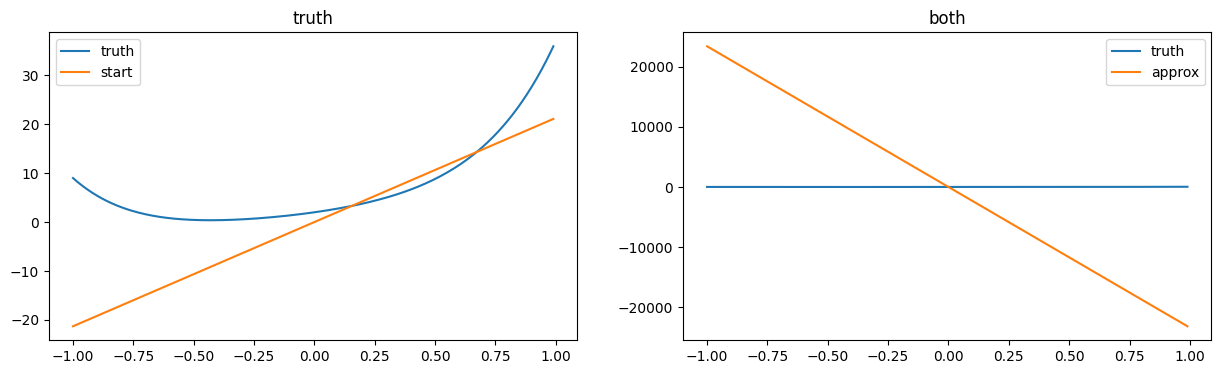

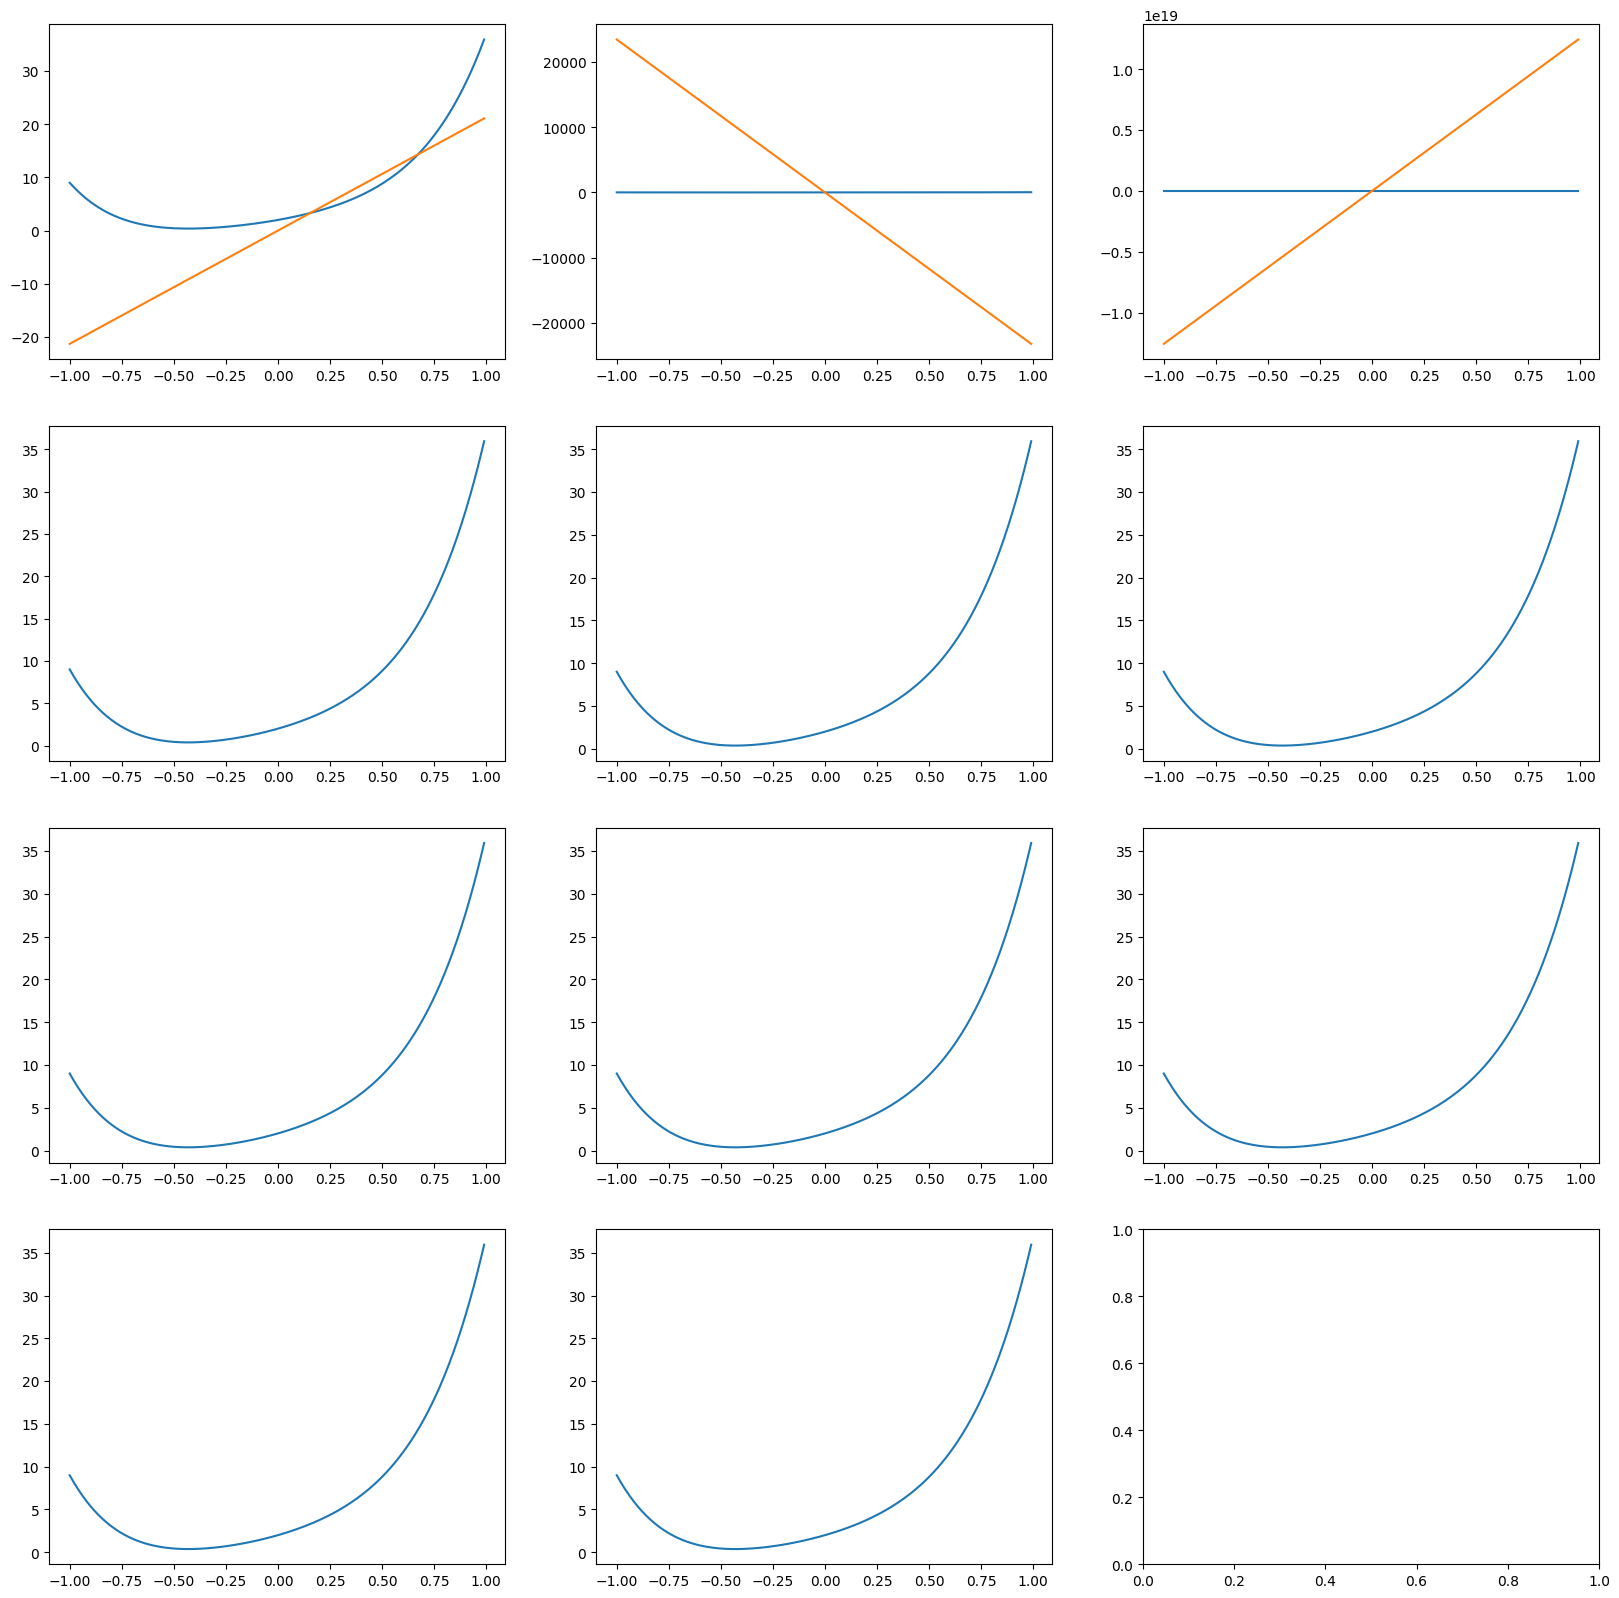

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4));

axs[0].plot(x, y, label='truth')
axs[0].plot(x, f_hat(x.reshape(-1,1), ws[0]), label='start')
axs[0].set_title("truth")
axs[0].legend();

axs[1].plot(x, y, label='truth')
axs[1].plot(x, f_hat(x.reshape(-1,1), ws[1]), label='approx')
axs[1].set_title("both")
axs[1].legend();

# w_to_plot = [ws[i] for i in range(len(ws)) if i % 5 == 0]
w_to_plot = ws

fig, axs = plt.subplots(len(w_to_plot) // 3 + 1, 3, figsize=(20, 20));

for i, my_w in enumerate(w_to_plot):
    axs[i // 3, i - 3 * (i // 3)].plot(x, y, label='truth')
    axs[i // 3, i - 3 * (i // 3)].plot(x, f_hat(x.reshape(-1,1), my_w), label='approx')